In [1]:
import numpy as np
import os 
from PIL import Image
import matplotlib.pyplot as plt
from utils import load_image, show
from downsample import downsample
from downsample.interpolation import pixel_unshuffle_downsample
from filters import apply_spatial_filter, apply_freq_filter
from utils import (
    calculate_mse,
    calculate_psnr,
    calculate_ssim,
    calculate_lpips
)

from tqdm import tqdm

加载图像

(392, 300, 3) float32


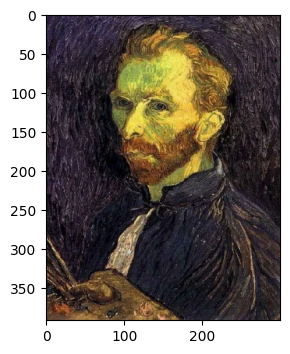

In [2]:
img = load_image('asserts/VanGogh.jpg')
print(img.shape, img.dtype)
show(img)

In [3]:
downsample_names = [
    'neighbor', 'bilinear', 'bicubic', 'unshuffle',
    'max_pooling', 'min_pooling', 'avg_pooling', 'l2_pooling',
    'random_conv2d', 'mean_conv2d', 'gaussion_conv2d', 'lanczos_conv2d'
]

In [4]:
for name in tqdm(downsample_names, desc="check"):
    if 'unshuffle' in name.lower():
        # print(name, pixel_unshuffle_downsample(img, 2, return_list=False).shape)
        print('skip pixel unshuffle')
        continue
    # print(name, downsample(img, 2, ds_name=name).shape)
    lr_img = downsample(img, 2, ds_name=name)
    # show(lr_img, name)

check:   0%|          | 0/12 [00:00<?, ?it/s]

check:  25%|██▌       | 3/12 [00:01<00:06,  1.30it/s]

unshuffle (196, 150, 12)


check: 100%|██████████| 12/12 [00:11<00:00,  1.08it/s]


gaussian
ideal
butterworth


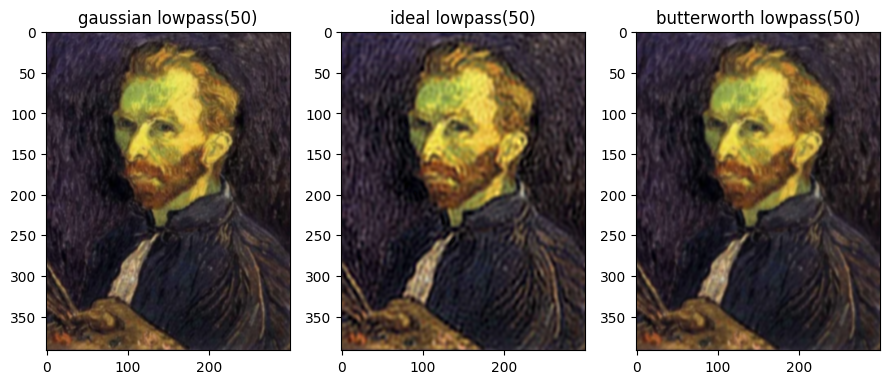

In [5]:
cutoff_freq = 50
freq_filters = ['gaussian', 'ideal', 'butterworth']
freq_filtered_imgs = []

for name in freq_filters:
    print(name)

    filterd_img = apply_freq_filter(img, name, cutoff_freq)
    freq_filtered_imgs.append(filterd_img)

show(freq_filtered_imgs, [f'{f} lowpass(50)' for f in freq_filters])
# freq_filtered_imgs


mean
gaussian
sinc
lanczos
kaiser


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.17487137..1.0921504].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0998719e-17..1.0].


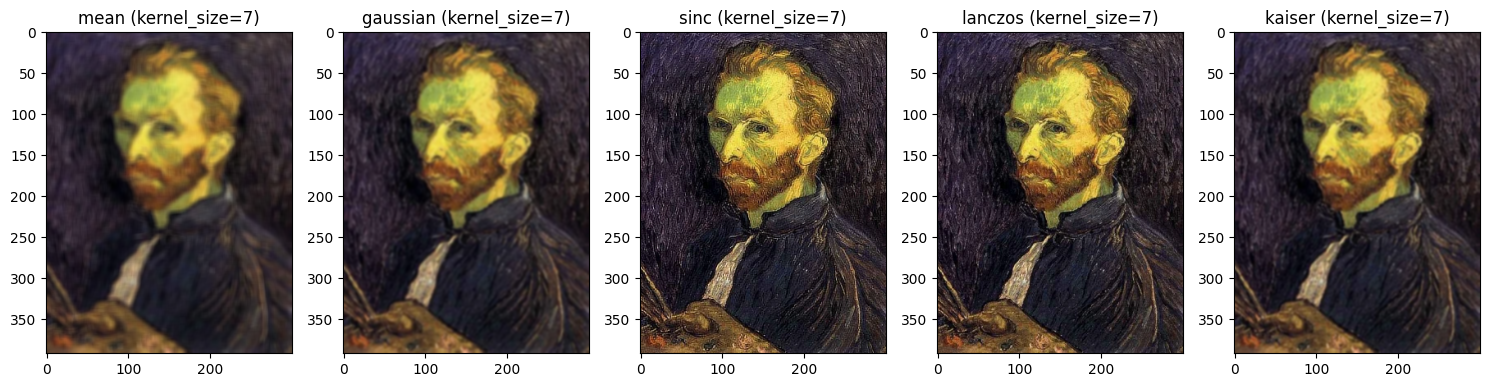

In [9]:
kernel_size = 7
spatial_filters = ['mean', 'gaussian', 'sinc', 'lanczos', 'kaiser']
spatial_filtered_imgs = []
for name in spatial_filters:
    print(name)
    filtered_img = apply_spatial_filter(img, name, kernel_size=kernel_size)
    spatial_filtered_imgs.append(filtered_img)

show(spatial_filtered_imgs, [f'{f} (kernel_size={kernel_size})' for f in spatial_filters])

In [12]:
filter_names = [
    'gaussian_lowpass', 'ideal_lowpass', 'butterworth_lowpass',
    'mean_spatial', 'gaussian_spatial', 'sinc_spatial', 'lanczos_spatial', 'kaiser_spatial'
] 

def filter(image, filter_name, cutoff_freq=50, kernel_size=7, **kwargs):
    if 'lowpass' in filter_name:
        name = filter_name.split('_')[0]
        return apply_freq_filter(image, name, cutoff_freq)
    elif 'spatial' in filter_name:
        name = filter_name.split('_')[0]
        return apply_spatial_filter(image, name, kernel_size)
    else:
        raise ValueError

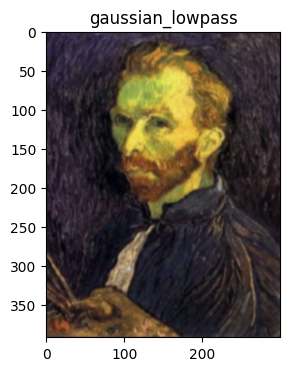

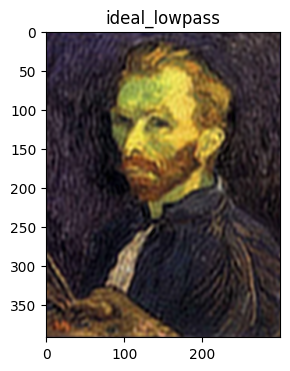

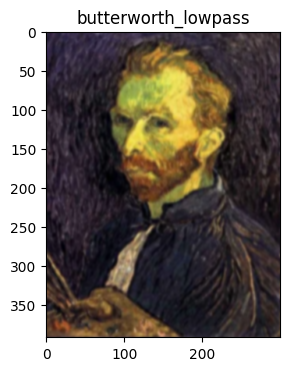

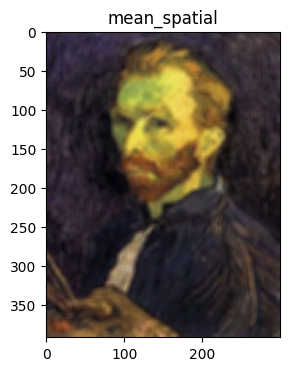

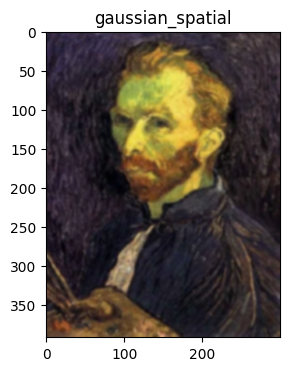

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.17487137..1.0921504].


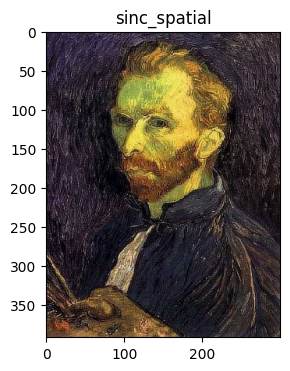

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0998719e-17..1.0].


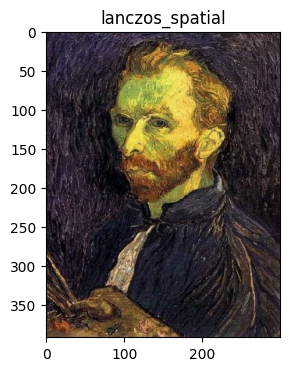

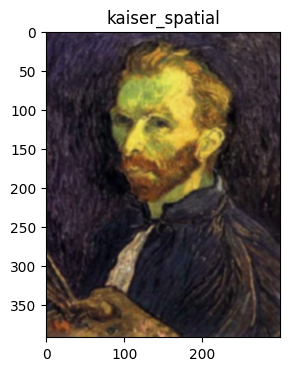

In [15]:
for name in filter_names:
    res = filter(img, name)
    show(res, name)

In [16]:
filter_names

['gaussian_lowpass',
 'ideal_lowpass',
 'butterworth_lowpass',
 'mean_spatial',
 'gaussian_spatial',
 'sinc_spatial',
 'lanczos_spatial',
 'kaiser_spatial']